In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
train_data=pd.read_excel(r"D:\Flight-fare-Prediction\Dataset _Flightfare.xlsx")

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB


In [11]:
data=train_data.copy()

In [12]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
data.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
def change_to_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [15]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [16]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
for feature in['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_to_datetime(feature)


In [18]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [19]:
data["Journey Day"]=data['Date_of_Journey'].dt.day

In [20]:
data["Journey Month"]=data['Date_of_Journey'].dt.month

In [21]:
data["Journey Year"]=data['Date_of_Journey'].dt.year

In [22]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Journey Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-06-23 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-06-23 05:50:00,2025-06-23 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-06-23 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-06-23 18:05:00,2025-06-23 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-06-23 16:50:00,2025-06-23 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [23]:
def extract_hour_min(df, col):
    df[col+"_hour"]=df[col].dt.hour
    df[col+"_min"]=df[col].dt.minute
    return df.head()

In [24]:
data.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey Day', 'Journey Month',
       'Journey Year'],
      dtype='object')

In [25]:
extract_hour_min(data,"Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Journey Year,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-06-23 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-06-23 05:50:00,2025-06-23 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-06-23 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-06-23 18:05:00,2025-06-23 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-06-23 16:50:00,2025-06-23 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [26]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Journey Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-06-23 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-06-23 05:50:00,2025-06-23 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-06-23 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-06-23 18:05:00,2025-06-23 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-06-23 16:50:00,2025-06-23 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [27]:
data.drop(['Arrival_Time','Dep_Time'], axis=1, inplace=True)

In [28]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Journey Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [29]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "Early Morning"
    elif(x>8) and (x<=12):
        return "Morning"
    elif(x>12) and (x<=16):
        return "Evening"
    elif(x>16) and (x<=24):
        return "Night"
    else:
        return "Late Night"

<Axes: xlabel='Dep_Time_hour'>

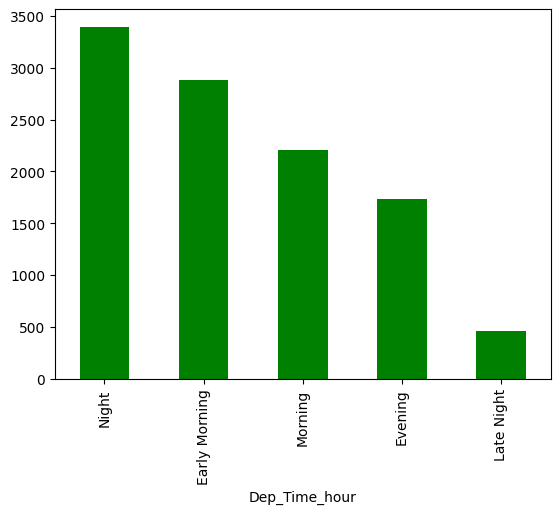

In [30]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar", color="g")

In [31]:
import plotly.express as px
import cufflinks as cf
from cufflinks.offline import go_offline
cf.set_config_file(world_readable=True, theme='pearl')
from plotly.offline import plot,iplot,init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [32]:
def pre_processs_duration(x):
    if 'h' not in x:
        x='0h'+' ' +x
    elif 'm' not in x:
        x= x+ ' ' +'0m'
    return x
        

In [33]:
data['Duration']=data['Duration'].apply(pre_processs_duration)

In [34]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [35]:
data['duration_hours']=data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [36]:
data['duration_mins']=data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [37]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Journey Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hours,duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [38]:
data['duration_hours']=pd.to_timedelta(data['Duration']).dt.components.hours

In [39]:
data['duration_mins']=pd.to_timedelta(data['Duration']).dt.components.minutes

In [40]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Journey Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hours,duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [41]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)


In [42]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

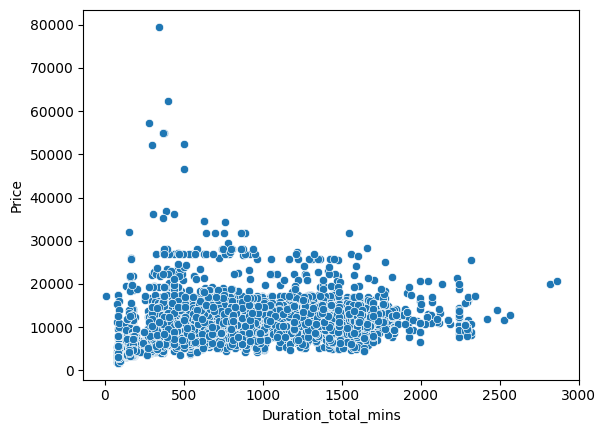

In [43]:
sns.scatterplot(x='Duration_total_mins', y='Price',data=data)

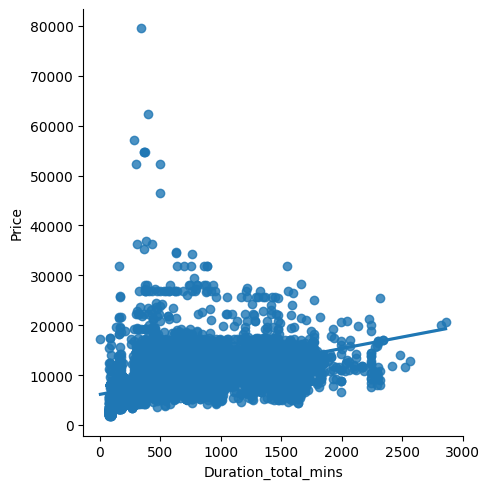

In [44]:
sns.lmplot(x='Duration_total_mins', y='Price',data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

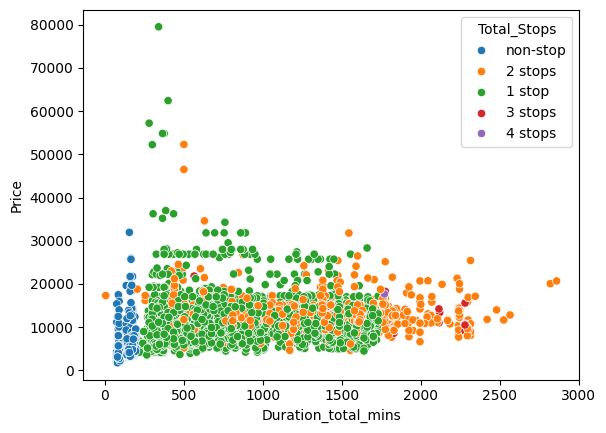

In [45]:
sns.scatterplot(x='Duration_total_mins', y='Price',hue='Total_Stops',data=data)

In [46]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
DEL → JAI → BOM → COK    207
BOM → HYD                207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → IDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → DED → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
dtype: int64

In [47]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Journey Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hours,duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,285


In [48]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey Day',
       'Journey Month', 'Journey Year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'duration_hours',
       'duration_mins', 'Duration_total_mins'],
      dtype='object')

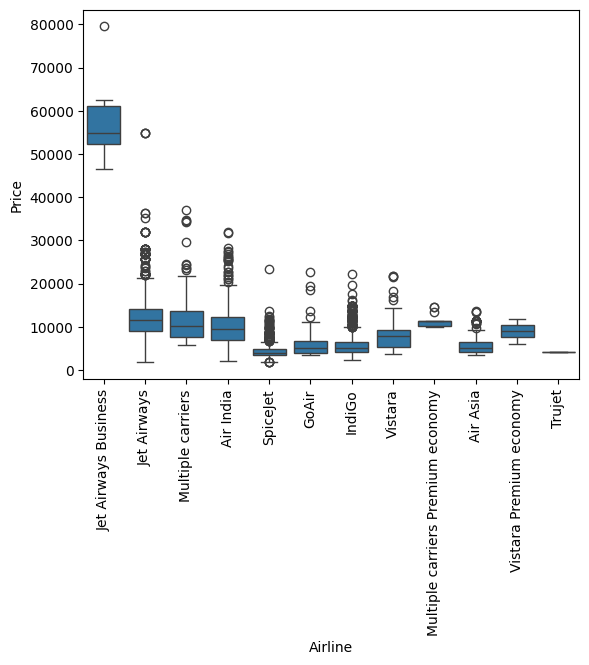

In [49]:
sns.boxplot(y='Price', x='Airline',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation='vertical')
plt.show()

In [50]:
'''
Jet Airways Business has comparitively much higher price
'''

'\nJet Airways Business has comparitively much higher price\n'

In [51]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Journey Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hours,duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,285


In [52]:
cat_col=[col for col in data.columns if data[col].dtype=="object"]

In [53]:
num_col=[col for col in data.columns if data[col].dtype!="object"]

In [54]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [55]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [56]:
for subcategory in data['Source'].unique():
    data['Source_'+subcategory]=data['Source'].apply(lambda x:1 if x==subcategory else 0)

In [57]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,...,Arrival_Time_hour,Arrival_Time_min,duration_hours,duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


In [58]:
data['Airline'].nunique()

12

In [59]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [60]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [61]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [62]:
dict_airlines={key:index for index , key in enumerate(airlines,0)}

In [63]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [64]:
data['Airline']=data['Airline'].map(dict_airlines)

In [65]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [66]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,...,Arrival_Time_hour,Arrival_Time_min,duration_hours,duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


In [67]:
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [68]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [69]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin', 'New Delhi'], dtype='object', name='Destination')

In [70]:
dict_dest={key: index for index,key in enumerate(dest,0)}

In [71]:
dict_dest

{'Kolkata': 0,
 'Hyderabad': 1,
 'Delhi': 2,
 'Banglore': 3,
 'Cochin': 4,
 'New Delhi': 5}

In [72]:
data['Destination']=data['Destination'].map(dict_dest)

In [73]:
data['Destination']

0        5
1        3
2        4
3        3
4        5
        ..
10678    3
10679    3
10680    2
10681    5
10682    4
Name: Destination, Length: 10682, dtype: int64

In [74]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,...,Arrival_Time_hour,Arrival_Time_min,duration_hours,duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,5,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,5,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


In [75]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [76]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [77]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [78]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [79]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey Day',
       'Journey Month', 'Journey Year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'duration_hours',
       'duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [80]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [81]:
data['Journey Year'].unique()

array([2019], dtype=int32)

In [82]:
'''
Since for additional info, 80%data is not available, we drop this column.
lets drop Date_of_Journey as well as we have already extracted "Journey_hour" , "jpuney_month" , Journey_day"..
lets drop Journey_year as well , as it has constant values throughtout dataframe which is 2019..
'''

'\nSince for additional info, 80%data is not available, we drop this column.\nlets drop Date_of_Journey as well as we have already extracted "Journey_hour" , "jpuney_month" , Journey_day"..\nlets drop Journey_year as well , as it has constant values throughtout dataframe which is 2019..\n'

In [83]:
data.drop(columns=['Date_of_Journey' , 'Additional_Info'  , 'Source' , 'Journey Year'] , axis=1 , inplace=True)

In [84]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey Day', 'Journey Month', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'duration_hours',
       'duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [85]:
data.head(2)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey Day,Journey Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hours,duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,5,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,13,15,7,25,445,0,1,0,0,0


In [86]:
data.drop('Route', axis=1, inplace=True)

In [87]:
data.head(2)

,Airline,Destination,Duration,Total_Stops,Price,Journey Day,Journey Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hours,duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,5,2h 50m,0,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,445,0,1,0,0,0


In [88]:
data.drop('Duration', axis=1,inplace=True)

In [89]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey Day,Journey Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hours,duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,5,0,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,445,0,1,0,0,0


In [98]:
def plot(df,col):
    fig, (ax1,ax2,ax3)=plt.subplots(3,1)
    
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

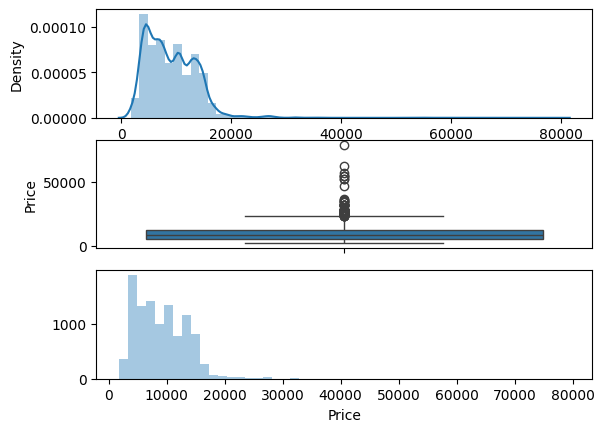

In [99]:
plot(data,'Price')

In [104]:
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)
iqr=q3-q1
maximum=q3+15*iqr
minimum=q1-1.5*iqr

In [105]:
print(maximum)

118813.0


In [106]:
print(minimum)

-5367.0


In [107]:
print([price for price in data['Price'] if price>maximum or price<minimum])

[]


In [111]:
### Dealing with outliers: wherever I have price >35K just replace replace it with median of Price
data["Price"]=np.where(data["Price"]>=35000, data["Price"].median(),data["Price"])

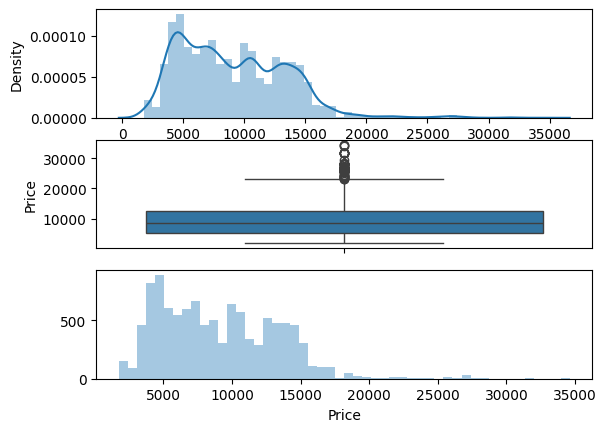

In [112]:
plot(data,'Price')

In [113]:
### Feautre Selection
x= data.drop(['Price'],axis=1)
y=data['Price']

In [114]:
from sklearn.feature_selection import mutual_info_regression

In [115]:
imp=mutual_info_regression(x,y)

In [116]:
imp

array([1.31816302, 1.17222458, 0.79276386, 0.37360062, 0.6319423 ,
       0.92808442, 0.75132578, 1.13938839, 0.90229135, 0.95439148,
       0.68100432, 1.77420462, 0.38699579, 0.45535626, 0.52035149,
       0.14251468, 0.20653716])

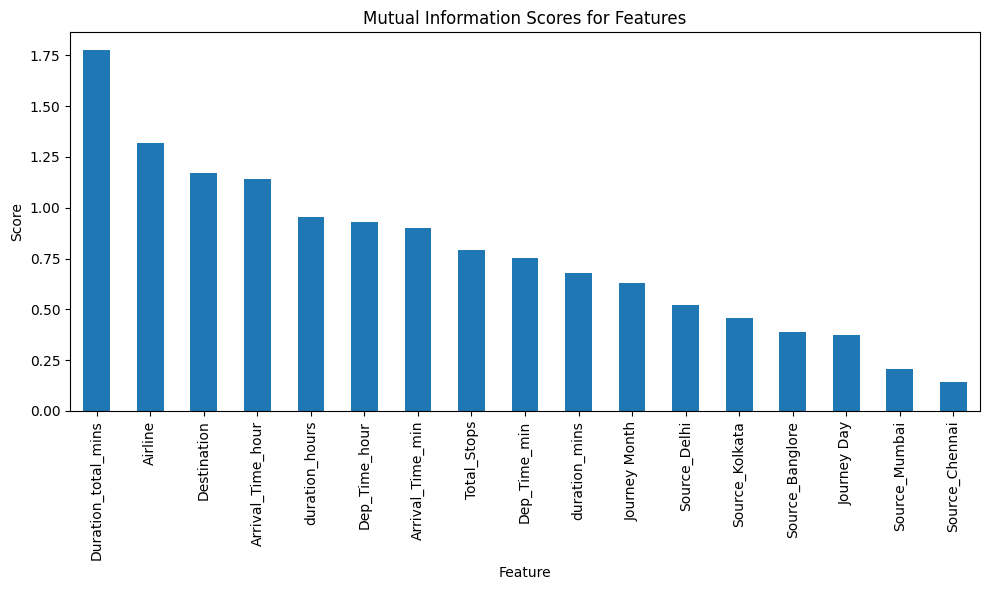

In [118]:


mi_scores = pd.Series(imp, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
mi_scores.plot(kind='bar')
plt.title("Mutual Information Scores for Features")
plt.ylabel("Score")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


In [120]:
imp_df=pd.DataFrame(imp,index=x.columns)

In [121]:
imp_df.columns=['importance']

In [123]:
imp_df.sort_values(by='importance', ascending=False)

,importance
Duration_total_mins,1.774205
Airline,1.318163
Destination,1.172225
Arrival_Time_hour,1.139388
duration_hours,0.954391
Dep_Time_hour,0.928084
Arrival_Time_min,0.902291
Total_Stops,0.792764
Dep_Time_min,0.751326
duration_mins,0.681004


In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [126]:
from sklearn.ensemble import RandomForestRegressor

In [127]:
ml_model=RandomForestRegressor()

In [128]:
ml_model.fit(x_train,y_train)

RandomForestRegressor()

In [129]:
y_pred=ml_model.predict(x_test)

In [130]:
y_pred

array([16852.18,  5408.08,  8731.37, ...,  3513.74,  6194.33,  6874.46])

In [131]:
from sklearn import metrics

In [132]:
metrics.r2_score(y_test, y_pred)

0.8149570750512861

In [133]:
def mape(y_true,y_pred):
    y_true, y_pred=np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [134]:
mape(y_test,y_pred)

np.float64(13.146267380181767)

In [135]:
def predict(ml_model):
    model=ml_model.fit(x_train,y_train)
    print('Training score: {}'.format(model.score(x_train,y_train)))
    y_predict=model.predict(x_test)
    print('Predictions are: {}'.format(y_predict))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_predict)
    print('r2_score: {}'.format(r2_score))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test,y_predict)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test,y_predict)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_absolute_error(y_test,y_predict))))
    print('MAPE: {}'.format(mape(y_test,y_predict)))
    sns.distplot(y_test-y_predict)

Training score: 0.9516348956589802
Predictions are: [16890.12  5686.15  8721.55 ...  3550.15  6336.62  6852.82]


r2_score: 0.8147965570582537
MAE: 1172.8729480818488
MSE: 3605466.4838492502
RMSE: 34.2472327069188
MAPE: 13.184064216639499


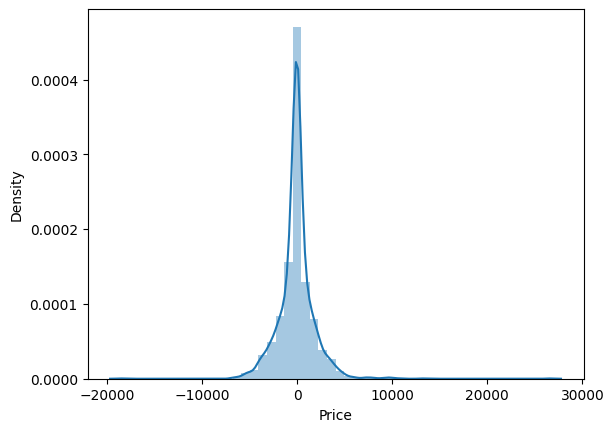

In [136]:
predict(RandomForestRegressor())

In [137]:
from sklearn.tree import DecisionTreeRegressor

Training score: 0.966591628243878
Predictions are: [16840.  4959.  8610. ...  3419.  5797.  6818.]


r2_score: 0.727678899909119
MAE: 1338.6822413577936
MSE: 5301438.157018803
RMSE: 36.58800679673318
MAPE: 14.82237939020656


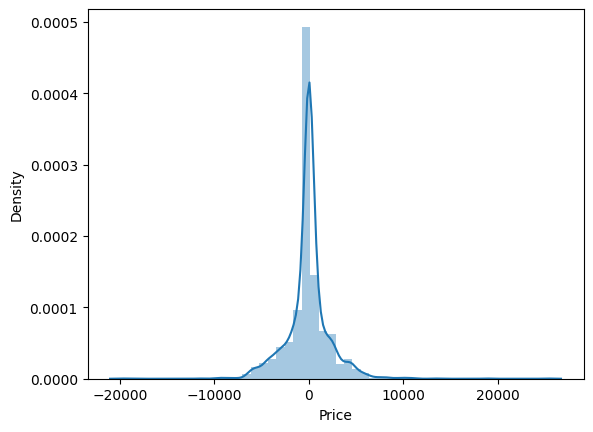

In [138]:
predict(DecisionTreeRegressor())

In [139]:
from sklearn.model_selection import RandomizedSearchCV

In [140]:
reg_rf=RandomForestRegressor()

In [142]:
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(start=5, stop=30, num=4)]
min_samples_split=[5,10,15,100]

In [143]:
random_grid= {
    'n_estimators' :n_estimators,
    'max_features' :max_features,
    'max_depth' :max_depth,
    'min_samples_split' : min_samples_split
}

In [144]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [161]:
rf_random= RandomizedSearchCV(estimator= reg_rf, param_distributions= random_grid, cv=3, n_jobs=-1, verbose=2)

In [162]:
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [163]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 30}

In [164]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=320)

In [165]:
rf_random.best_score_

np.float64(0.7969581653108873)